# **Stroke Prediction Dataset**
\
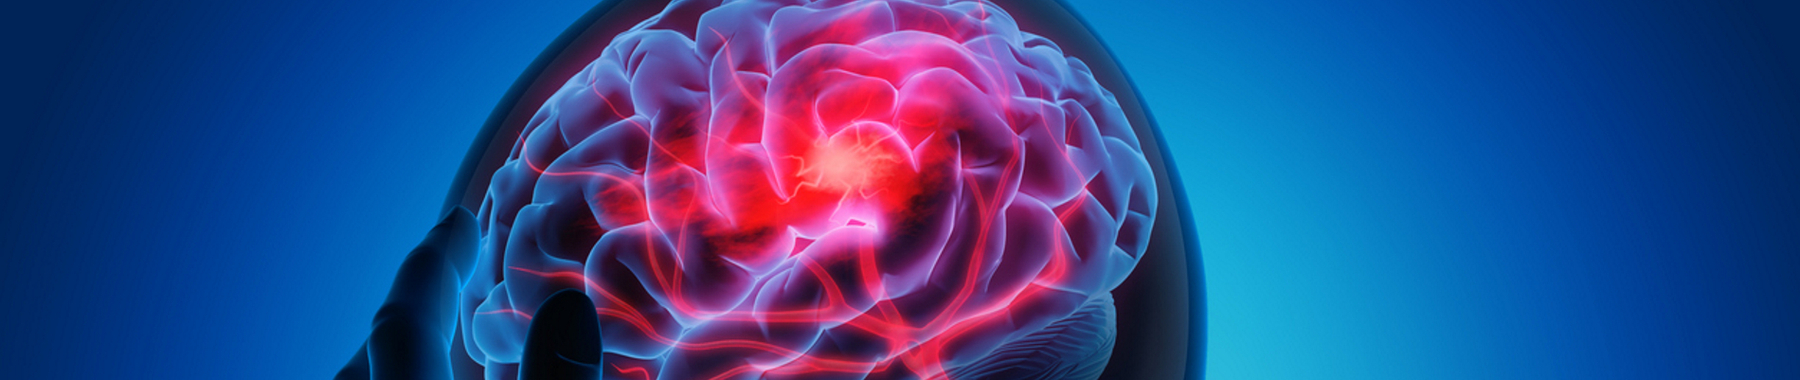

###**Source:**[Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data?select=healthcare-dataset-stroke-data.csv)
###**Content:**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

➡ Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

In [90]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [92]:
#Printing the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


➡ The dataset has 5110 rows andd 12 colomns

➡ The data seems to have both numerical and categorial features, and bmi has few missing values

In [94]:
#Describe the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


➡ There are some coloms with huge difference between 75% to max values indicating there might be skewness or potential outliers .So plotting histogram and boxplot for better understanding.

In [95]:
#find the null values
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


➡ Colomn bmi has 201 null values

In [96]:
#Class distribution values counts for label
data['stroke'].value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


➡ There is huge imbalance in percentage of classes in stroke which could impact model performance so this should be addressed with techniques like resampling or class weight adjustment.

In [97]:
#Print the duplicated rows
data.duplicated().sum()

np.int64(0)

➡ There are no duplicate values

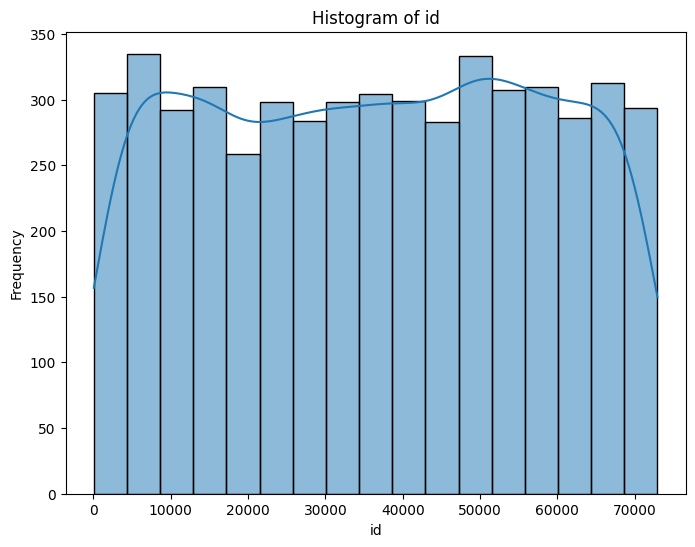

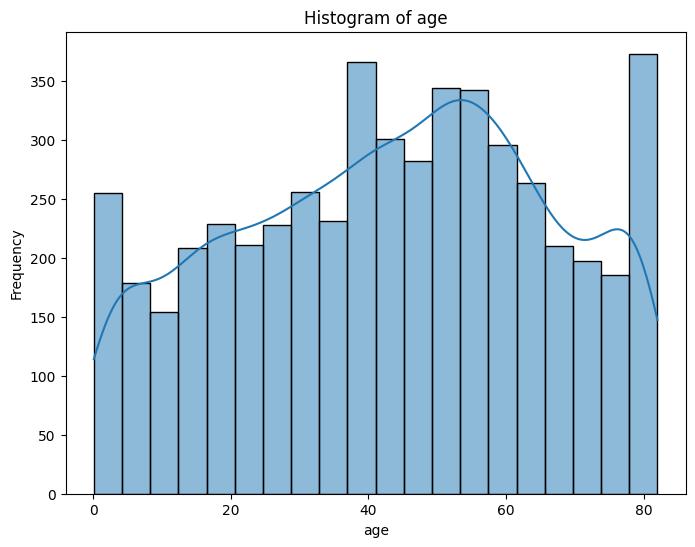

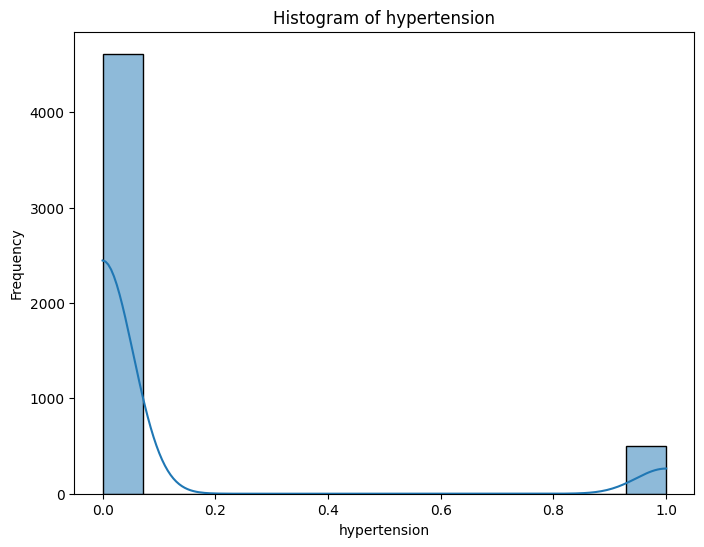

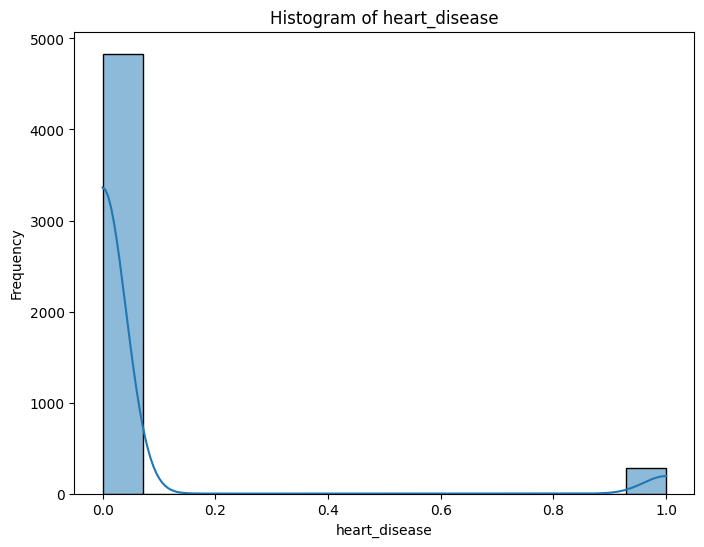

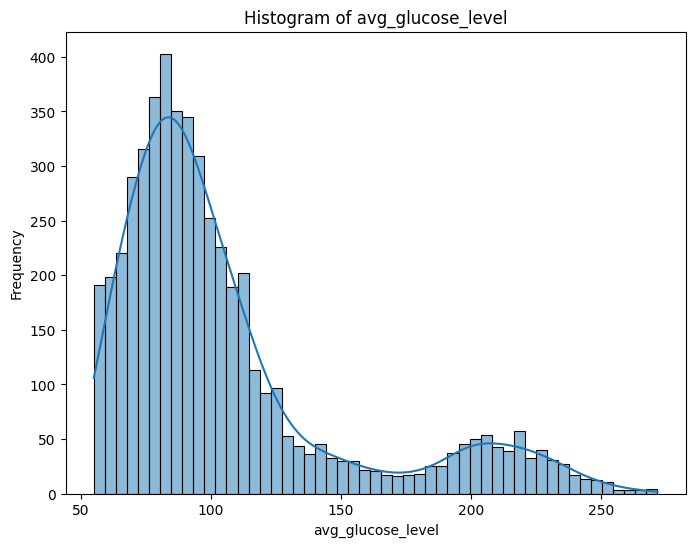

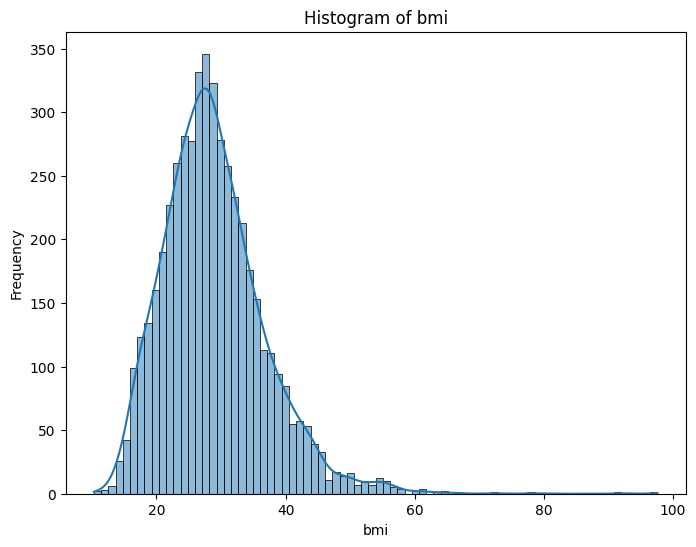

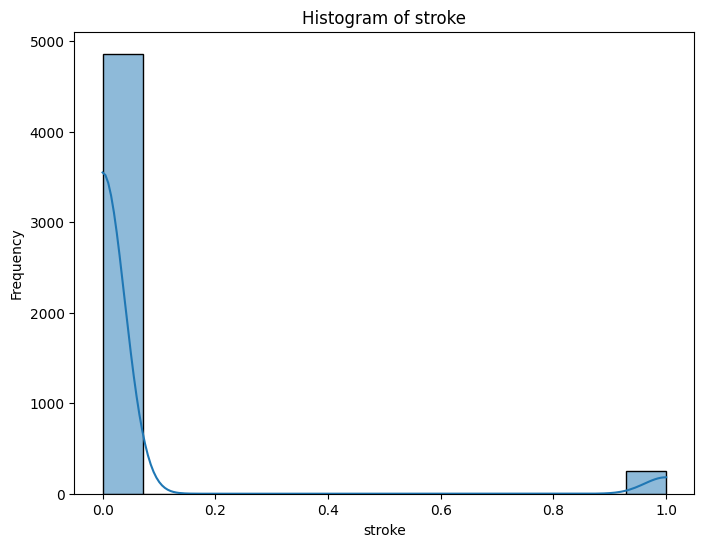

In [98]:
# histograms for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

1. **Age:**
\
The ages range from 0 to approximately 80 years.The highest frequency occurs in the younger age groups (likely between 0-40 years), as indicated by the tallest bar(s) on the left side of the histogram.There is a slight uptick in frequency around the 60-80 age range, though this could also represent a smaller subgroup.

2. **hypertension:**
\
The bar at 0.0 (no hypertension) is significantly taller (~ 4000 frequency), meaning most individuals in the dataset do not have hypertension.The bar at 1.0 (hypertension present) is much shorter (~1000 frequency), suggesting hypertension is less common in this sample.The dataset is imbalanced, with hypertension being relatively uncommon (present in ~20% of cases, assuming 4000 vs. 1000 frequencies)
3. **Heart disease:**
\
The distribution of heart disease in the dataset appears to be strictly bimodal. A significant majority of the population is classified with a "0," indicating no heart disease. Approximately 5,000 instances fall into this category. In contrast, the "1" class, representing the presence of heart disease, has considerably fewer occurrences, with fewer than 1,000 recorded cases. This observation highlights a clear imbalance in the dataset, where heart disease remains a relatively uncommon condition compared to its absence.
4. **avg glucose levels:**
\
The average glucose levels in the dataset range from 50 to 250, with the majority of values concentrated between 50 and 150. A prominent peak appears around 100, and the distribution shows a slight rightward skew near 200.This suggests most individuals have less or moderate avg glucose level while few have very high levels.
5. **BMI:**
\
The BMI values in the dataset range from ~ 10 to 100, with the majority of the data concentrated between approximately 10 and 60. A slight rightward skew can be observed around the BMI value of 60. Additionally, there are very few data points between 60 and 100, suggesting the presence of potential outliers.
6. **stroke:**
\
The majority of the data is concentrated in stroke class 0, with approximately 5,000 instances observed. In contrast, class 1 has significantly fewer occurrences, with fewer than 1,000 cases. This indicates a strong class imbalance, with the data being notably biased toward stroke class 0.

In [99]:
'''#Cross refernce age with hypertension
# Bin ages and group
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80])
grouped = data.groupby('age_group')['hypertension'].agg(['count', 'sum'])
grouped['prevalence'] = (grouped['sum'] / grouped['count']) * 100

# Plot
sns.barplot(x=grouped.index, y=grouped['prevalence'])'''

"#Cross refernce age with hypertension\n# Bin ages and group\ndata['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80])\ngrouped = data.groupby('age_group')['hypertension'].agg(['count', 'sum'])\ngrouped['prevalence'] = (grouped['sum'] / grouped['count']) * 100\n\n# Plot\nsns.barplot(x=grouped.index, y=grouped['prevalence'])"

➡ Hypertension prevalence steadily increases with age, peaking in the oldest group (60–80 years). This aligns with known medical trends where age is a key risk factor for hypertension.

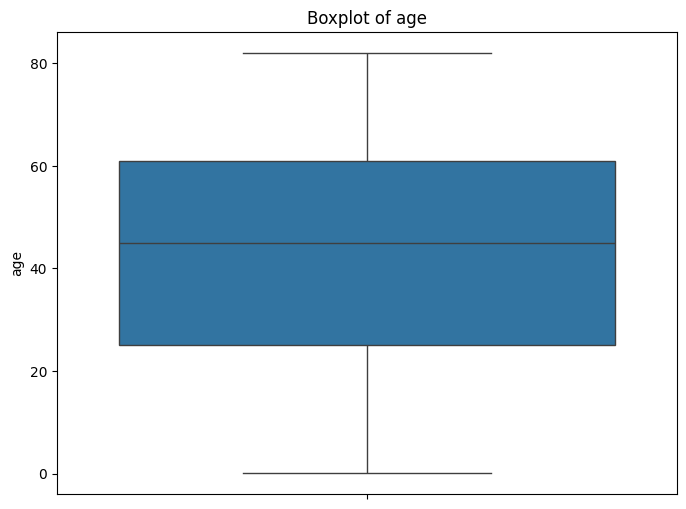

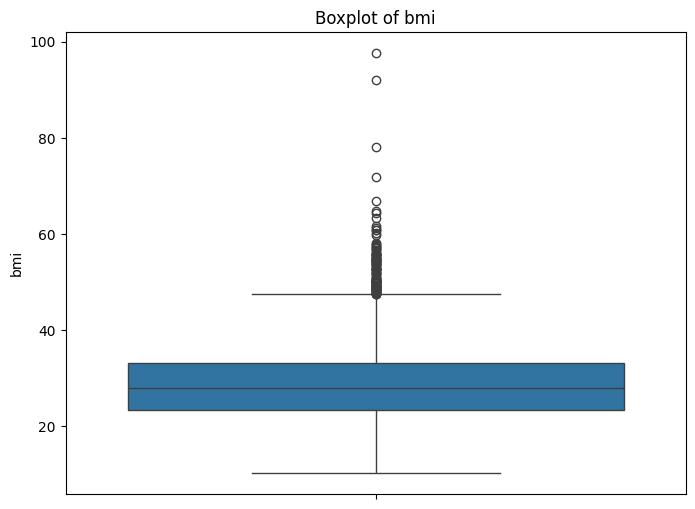

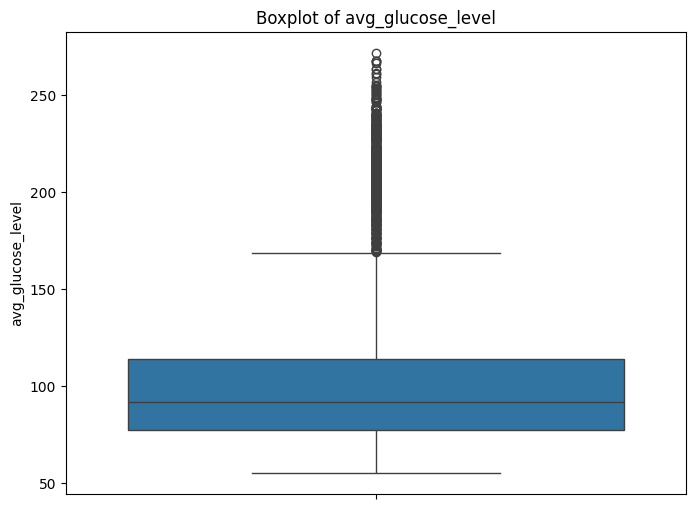

In [100]:
# boxplots for numerical columns
columns =['age','bmi','avg_glucose_level']
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [101]:
#Fixing the outliers for coloumns with continous data
def fix_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])
    return df

# Apply the function to the specified columns
for col in ['age','bmi','avg_glucose_level']:
    data = fix_outliers(data, col)

In [102]:
#Print the null values in colomns
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [103]:
# Fill missing BMI values with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

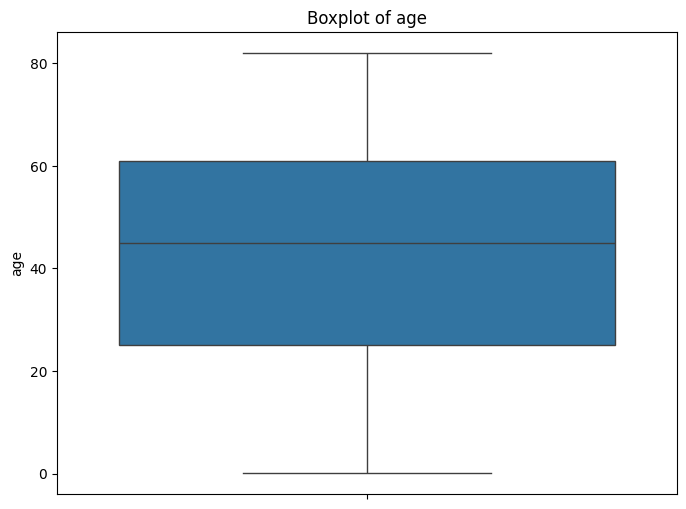

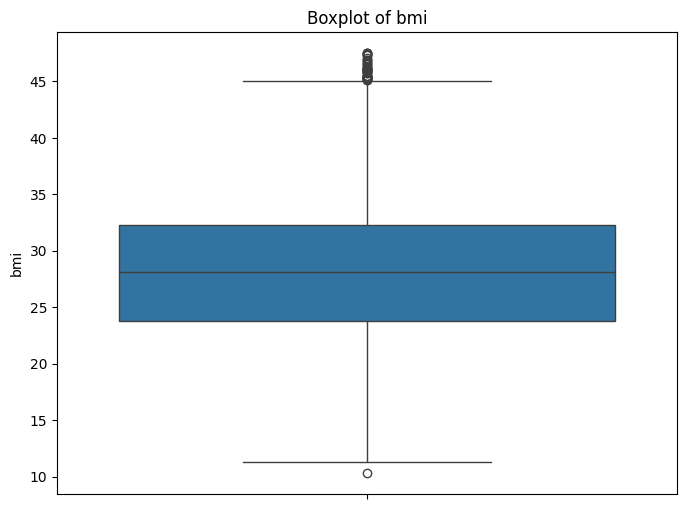

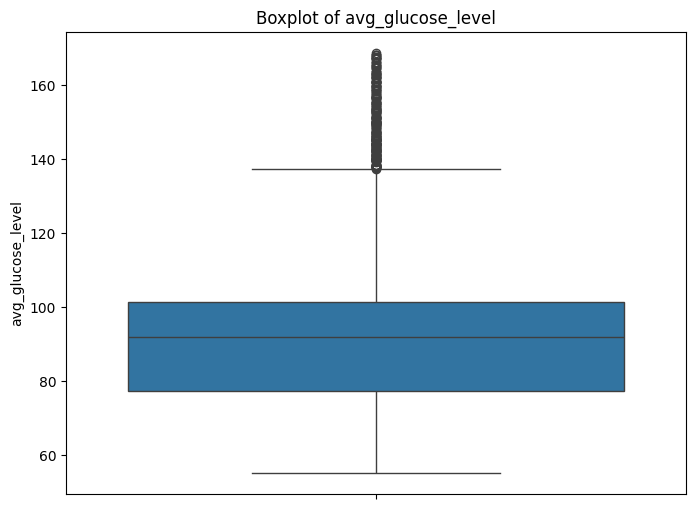

In [104]:
# Plotting boxplots for each column
for col in ['age','bmi','avg_glucose_level']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

➡ avg_glucose_level and bmi still has few outliers.

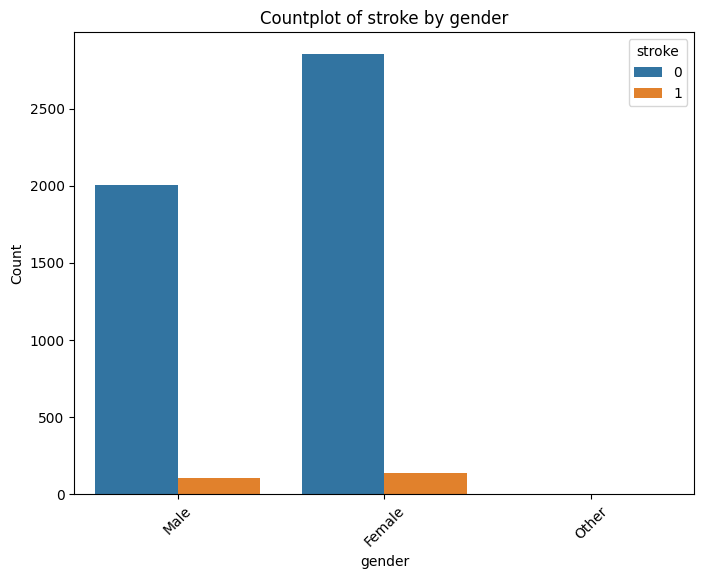

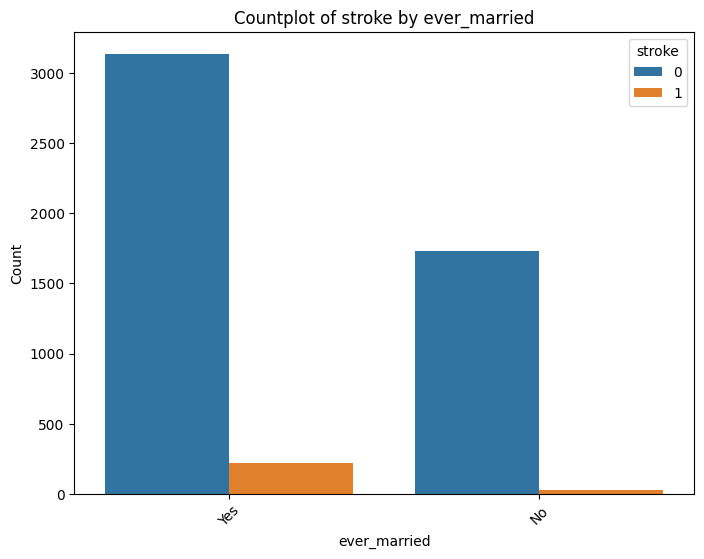

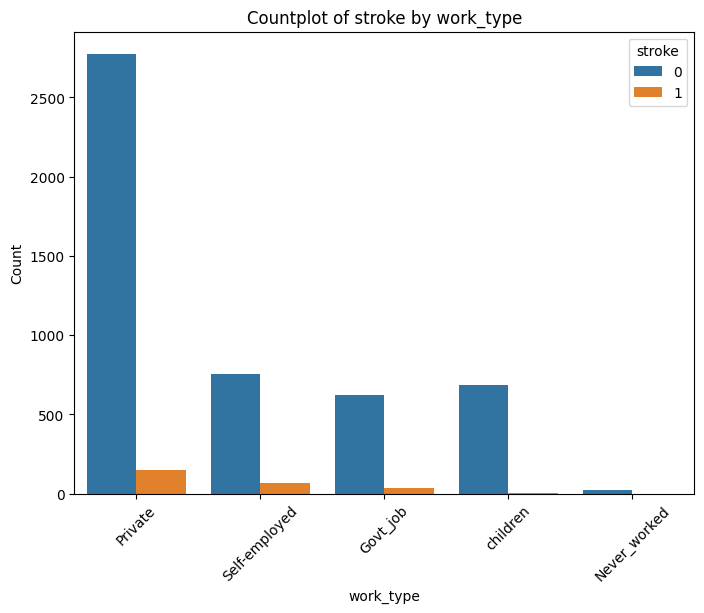

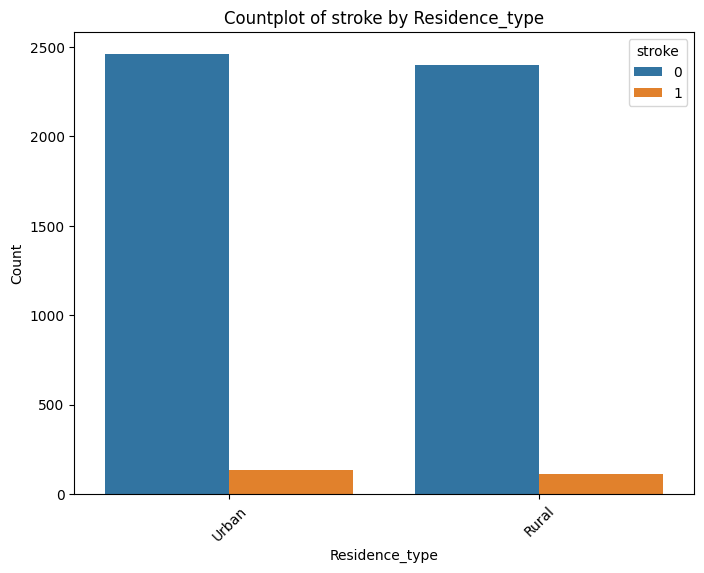

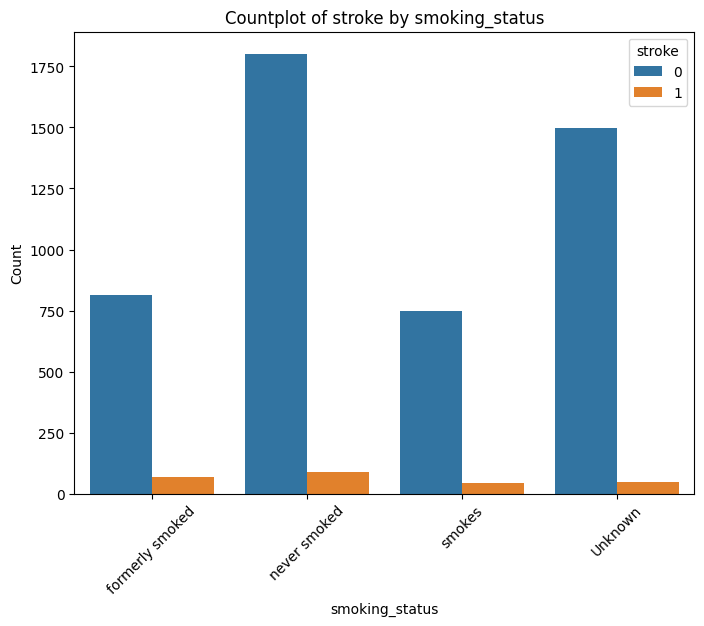

In [105]:
# countplots for categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col], hue=data['stroke'])
    plt.title(f'Countplot of stroke by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


1. **Gender:**
\
The dataset contains more female individuals compared to males. However, gender does not appear to have a significant impact on stroke classification, as both males and females show a similar number of instances in stroke class 1, with females having a slightly higher count than males.
2. **evermarried:**
\
From the "Ever Married" count plot, it is evident that most individuals in the dataset are married. There are noticeably more instances of married individuals belonging to stroke class 1 compared to those who are not married. This suggests that married individuals experienced strokes more frequently than their unmarried counterparts.
3. **work type:**
\
Most individuals in the dataset are employed in the private sector, with over 2,500 data points concentrated there. The remaining data points are more evenly distributed among the self-employed, government jobs, children, and those who have never worked. Among individuals who experienced a stroke (class 1), the highest number is observed in the private sector, followed by the self-employed and then government employees. Very few stroke instances are seen among children.
4. **residence type:**
\
The data appears to be fairly evenly distributed between urban and rural resident types. The number of stroke cases (class 1) is also nearly equal between the two, with urban residents showing a slightly higher number of cases compared to rural residents.
5. **smoking status:**
\
The group of individuals who have never smoked exhibits the highest frequency of instances in both class 0 and class 1, relative to those categorized as "formerly smoked," "smokes," and "unknown." This is followed by individuals with an "unknown" smoking status. The "formerly smoked" group shows a nearly equivalent number of stroke cases (class 1) as the "never smoked" group, with the latter exhibiting slightly fewer occurrences.


In [106]:
# Initialize LabelEncoder
le = LabelEncoder()

# Define categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply Label Encoding to each column and store mappings
label_mappings = {}
for col in categorical_cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mappings
for col, mapping in label_mappings.items():
    print(f"Label mappings for {col}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} == {encoded_value}")
    print()

Label mappings for gender:
  Female == 0
  Male == 1
  Other == 2

Label mappings for ever_married:
  No == 0
  Yes == 1

Label mappings for work_type:
  Govt_job == 0
  Never_worked == 1
  Private == 2
  Self-employed == 3
  children == 4

Label mappings for Residence_type:
  Rural == 0
  Urban == 1

Label mappings for smoking_status:
  Unknown == 0
  formerly smoked == 1
  never smoked == 2
  smokes == 3



In [107]:
# Value counts for categorical features
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


Value counts for gender:
gender
0    2994
1    2115
2       1
Name: count, dtype: int64

Value counts for ever_married:
ever_married
1    3353
0    1757
Name: count, dtype: int64

Value counts for work_type:
work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64

Value counts for Residence_type:
Residence_type
1    2596
0    2514
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64



In [108]:
#Print the shape of dataset
data.shape

(5110, 12)

In [109]:
# Split into features and target
X = data.drop(['stroke', 'id'], axis=1)  # Dropping ID as it's not a predictive feature
y = data['stroke']

In [110]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
stroke
0    3403
1     174
Name: count, dtype: int64

Test set class distribution:
stroke
0    1458
1      75
Name: count, dtype: int64


1. The data was split into training (3577 samples) and testing (1533 samples) sets

2. Stratified sampling ensured the class distribution was maintained in both sets

3. The ID column was dropped as it's not a meaningful feature for prediction

➡ Random Forest algorithms typically don't require feature scaling (normalization or standardization) for several fundamental reasons:

1. Nature of Decision Trees
Random Forests are ensembles of decision trees, and decision trees have properties that make scaling unnecessary:

 * Splitting based on values: Decision trees make splits by comparing feature values to thresholds, not by calculating distances

 * Order preservation: Scaling maintains the order of values, so splits would be identical before and after scaling

 * No distance calculations: Unlike algorithms like KNN or SVM, trees don't use Euclidean distance or other distance metrics

In [111]:
# Initial Random Forest parameters
rf_params = {
    'n_estimators': 100,       # Number of trees
    'max_depth': 10,           # Maximum depth of each tree
    'min_samples_split': 5,    # Minimum samples required to split a node
    'min_samples_leaf': 2,     # Minimum samples required at each leaf node
    'max_features': 'sqrt',    # Number of features to consider at each split
    'class_weight': 'balanced',# Adjust weights for imbalanced classes
    'random_state': 42,        # For reproducibility
    'n_jobs': -1              # Use all processors
}

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

Accuracy: 0.8969341161121983

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1458
           1       0.19      0.33      0.24        75

    accuracy                           0.90      1533
   macro avg       0.58      0.63      0.59      1533
weighted avg       0.93      0.90      0.91      1533


Confusion Matrix:
 [[1350  108]
 [  50   25]]


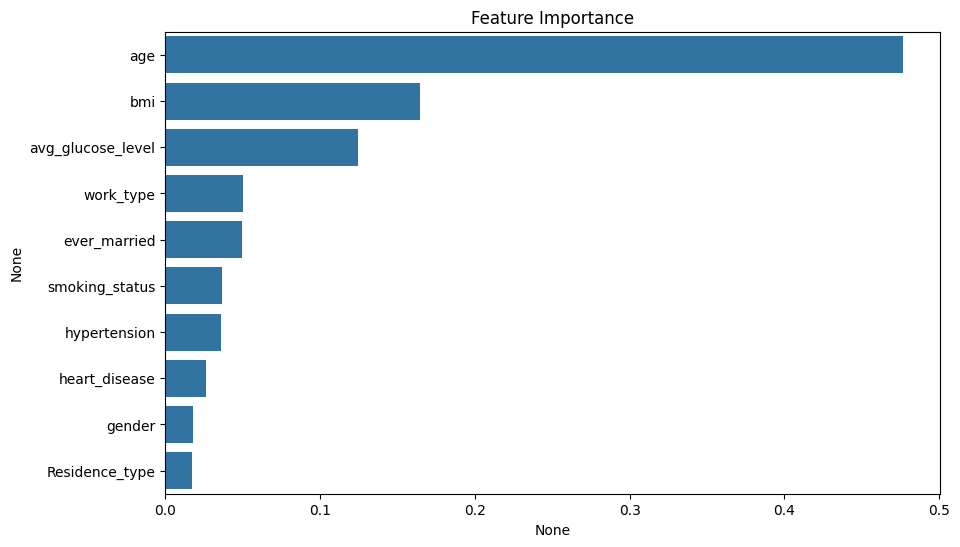

'# Feature importance\nfeature_importances = pd.DataFrame({\n    \'Feature\': X.columns,\n    \'Importance\': rf_model.feature_importances_\n}).sort_values(\'Importance\', ascending=False)\n\nprint("\nFeature Importances:\n", feature_importances)\n\n# Plot feature importance\nplt.figure(figsize=(10, 6))\nplt.barh(feature_importances[\'Feature\'], feature_importances[\'Importance\'])\nplt.xlabel(\'Importance\')\nplt.title(\'Feature Importance\')\nplt.show()'

In [112]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

'''# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()'''

1. The accuracy of model is 90%
 * class 0  seems to have good precision (0.96) and recall(0.93) which is good but
 * class 1 has precision (0.19) and recall(0.33) which is very poor indicating biasing towards class 0  as most of stroke data belongs to class 0 (~ 95%) and only (~ 4%) belongs to class 1
2. Feature importance shows age, bmi, avg_glucose_level as most important features.

In [113]:
#Print training and testing metrics
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, rf_model.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, rf_model.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, rf_model.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, rf_model.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 0.947
Training Precision : 0.974
Training Recall : 0.947
Training F1 Score : 0.956

Testing Accuracy : 0.897
Testing Precision : 0.926
Testing Recall : 0.897
Testing F1 Score : 0.91


1. Metrics/performance:
- Accuracy (89%): Looks high but misleading due to class imbalance.
- Minority Class (Class 1):
  - Precision: 92.6% → Most positive predictions are right.
  - Recall: 89.7% → Model misses ~11% of actual positives.
  - F1-Score: 91% → good for minority detection.

- Eventhough class weight is balanced it's still observed the model is biased towards class 0. So we try resampling the data using smote or rus(RandomUnderSampler) technique

In [124]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Training set class distribution after undersampling:")
print(y_train_resampled.value_counts())

# Now train your model using X_train_resampled and y_train_resampled
rf_model_resampled = RandomForestClassifier(**rf_params)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

Training set class distribution after undersampling:
stroke
0    174
1    174
Name: count, dtype: int64


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [125]:
# Make predictions on the test set using the resampled model
y_pred_resampled = rf_model_resampled.predict(X_test)

# Evaluate the resampled model
print("Accuracy (Resampled):", accuracy_score(y_test, y_pred_resampled))
print("\nClassification Report (Resampled):\n", classification_report(y_test, y_pred_resampled))
print("\nConfusion Matrix (Resampled):\n", confusion_matrix(y_test, y_pred_resampled))

#Print training and testing metrics for resampled model
print('Training Accuracy (Resampled) :', np.round(metrics.accuracy_score(y_train_resampled, rf_model_resampled.predict(X_train_resampled)),3))
print('Training Precision (Resampled) :', np.round(metrics.precision_score(y_train_resampled, rf_model_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training Recall (Resampled) :' , np.round(metrics.recall_score(y_train_resampled, rf_model_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training F1 Score (Resampled) :' , np.round(metrics.f1_score(y_train_resampled, rf_model_resampled.predict(X_train_resampled), average='weighted'),3))
print('\nTesting Accuracy (Resampled):' ,  np.round(metrics.accuracy_score(y_test, y_pred_resampled),3))
print('Testing Precision (Resampled) :' , np.round(metrics.precision_score(y_test, y_pred_resampled, average='weighted'),3))
print('Testing Recall (Resampled) :' , np.round(metrics.recall_score(y_test, y_pred_resampled, average='weighted'),3))
print('Testing F1 Score (Resampled) :' , np.round(metrics.f1_score(y_test, y_pred_resampled, average='weighted'),3))


Accuracy (Resampled): 0.6816699282452707

Classification Report (Resampled):
               precision    recall  f1-score   support

           0       0.99      0.67      0.80      1458
           1       0.12      0.85      0.21        75

    accuracy                           0.68      1533
   macro avg       0.55      0.76      0.50      1533
weighted avg       0.95      0.68      0.77      1533


Confusion Matrix (Resampled):
 [[981 477]
 [ 11  64]]
Training Accuracy (Resampled) : 0.914
Training Precision (Resampled) : 0.916
Training Recall (Resampled) : 0.914
Training F1 Score (Resampled) : 0.914

Testing Accuracy (Resampled): 0.682
Testing Precision (Resampled) : 0.946
Testing Recall (Resampled) : 0.682
Testing F1 Score (Resampled) : 0.772


In [115]:
 # Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Training set class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Training set class distribution after SMOTE:
stroke
0    3403
1    3403
Name: count, dtype: int64


# smote

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in datasets.  It works by creating synthetic samples of the minority class, rather than simply duplicating existing ones.  This helps to balance the class distribution without introducing bias from over-representation of existing minority class examples.  It does this by selecting a minority class instance and finding its k-nearest neighbors (also from the minority class).  New synthetic instances are then created along the line segments connecting these instances.  This generates new data points that are similar to the existing minority class examples but not identical, effectively increasing the size of the minority class and improving model performance.


In [127]:
# Initialize and train baseline model
rf_resampled = RandomForestClassifier(**rf_params) # Unpack rf_params using **
rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_resampled.predict(X_test)

# Evaluation
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1458
           1       0.12      0.85      0.21        75

    accuracy                           0.68      1533
   macro avg       0.55      0.76      0.50      1533
weighted avg       0.95      0.68      0.77      1533

Accuracy: 0.6817


Inference:
1. oversampling (SMOTE) and undersampling (rus) did not give better results

2. performance on class 0 (precision 0.99, recall 0.67) than class 1 (precision 0.12, recall 0.85)

3. There is reduction in recall for class 0 and precision for class 1

In [117]:
#Print testing and training metrics
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train_resampled, rf_resampled.predict(X_train_resampled)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.883
Testing Precision : 0.912
Testing Recall : 0.883
Testing F1 Score : 0.897


➡ After resampling the overall testing accuracy and recall seems to have decrease to 83% ,and big difference between testing and training accuracy suggests oversampling

In [119]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0:1, 1:5}, {0:1, 1:10}]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',  # Focus on improving recall for stroke cases
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nOptimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      1458
           1       0.11      0.76      0.20        75

    accuracy                           0.70      1533
   macro avg       0.55      0.73      0.51      1533
weighted avg       0.94      0.70      0.79      1533


Optimized Confusion Matrix:
 [[1018  440]
 [  18   57]]


1.**'balanced'**: Automatically adjusts weights inversely proportional to class frequencies
* Formula: weight = total_samples / (n_classes * np.bincount(y))

* In this case with ~95% non-stroke and ~5% stroke:

* Non-stroke weight: ~1.05

* Stroke weight: ~20.0

* The model will treat a stroke case as ~20x more important than a non-stroke case

2. **{0:1, 1:5}:**

* Manual weights where:

  * Class 0 (non-stroke) has weight 1

  * Class 1 (stroke) has weight 5

* Stroke cases are 5x more important than non-stroke cases

3. **{0:1, 1:10}:**

* Manual weights where:

  * Class 0 (non-stroke) has weight 1

  * Class 1 (stroke) has weight 10

* Stroke cases are 10x more important than non-stroke cases

In [121]:
#Print testing and training metrics for optimized model
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, best_rf.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, best_rf.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred_best),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred_best, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred_best, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred_best, average='weighted'),3))

Training Accuracy : 0.721
Training Precision : 0.953
Training Recall : 0.721
Training F1 Score : 0.801

Testing Accuracy : 0.701
Testing Precision : 0.94
Testing Recall : 0.701
Testing F1 Score : 0.786


➡ The model using these Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}  has these metrics

 * Trainig and Testing accuraccy seems to have declined to ~72 to 70 compared to other models 89.7% but the class imbalace has been hugely rectified in this model

 * The precision and recall for
   * class 0 (precision (0.98) and recall(0.70))
   * class 1 (precision (0.11) and recall(0.76))
 * Although the recall and precision for class 0 is reduced , recall for class 1 is increased and precision is reduced
 * In this case ,class 1 has few false negatives and more false positives
 * But the overall testing precision seems to increase to 94%


# 🌳🌳 What is a Random Forest?

A **Random Forest** is an ensemble machine learning method that builds multiple decision trees and combines their outputs to improve predictive performance and stability. It works by:

- **Training multiple decision trees** on different random subsets of the data
- **Averaging** the results (for regression) or using **majority vote** (for classification)

Random Forest reduces overfitting and increases accuracy compared to a single decision tree.

---

## 📌 When to Use Random Forest

- When you need a **powerful, general-purpose** model  
- For **both classification and regression** tasks  
- When your data has **many features** or **noisy labels**  
- To **estimate feature importance** robustly  
- When **overfitting** is a concern with single models  

---

## 🧠 Key Assumptions

- Trees in the forest are **weakly correlated**  
- **Bootstrap samples** (random sampling with replacement) are representative  
- Each tree has **high variance, low bias**, but averaging reduces variance  
- Features are **randomly selected** at each split to ensure diversity  

---

## ✅ Advantages

- **High accuracy** (better than individual decision trees)  
- **Resistant to overfitting**  
- Handles **large datasets** and **high-dimensional spaces**  
- **Works well** with missing or unbalanced data  
- Provides **feature importance rankings**  
- **Versatile** for many types of tasks  

---

## ⚠️ Disadvantages

- **Less interpretable** than a single decision tree  
- **Slower** and **more resource-intensive** (many trees to train/predict)  
- Can be **biased toward dominant classes** if data is imbalanced  
- **Harder to tune** (e.g., number of trees, max depth, features per split)  
- Not ideal when you need a **simple, explainable model**

---
